In [2]:
import pandas as pd 
import numpy as np 
df = pd.read_csv(r'C:\Users\visha\OneDrive\Desktop\pytorch\twitter_training.csv')
df1= pd.read_csv(r'C:\Users\visha\OneDrive\Desktop\pytorch\twitter_validation.csv')


In [3]:
from sklearn.model_selection import train_test_split 

train_text, temp_text, train_labels, temp_labels = train_test_split(df['tweet'], df['sentiment'], 
																	random_state = 2021, 
																	test_size = 0.3, 
																	stratify = df['sentiment']) 


val_text, test_text, val_labels, test_labels = train_test_split(df1['tweet'], df1['sentiment'], 
																random_state = 2021, 
																test_size = 0.5, 
																stratify = df1['sentiment'])


In [22]:
df.dtypes

tweet_id      int64
entity       object
sentiment    object
tweet        object
dtype: object

In [24]:
df['entity'] = df['entity'].astype(str)
df['sentiment'] = df['sentiment'].astype(str)
df['tweet'] = df['tweet'].astype(str)

tweet_id      int64
entity       object
sentiment    object
tweet        object
dtype: object

In [5]:
from transformers import AutoModel, BertTokenizerFast

In [6]:
#load model and tokenizer 
bert = AutoModel.from_pretrained('bert-base-uncased') 
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased') 


In [8]:
import matplotlib.pyplot as plt

In [10]:
train_text

4838     Today, a parcel arrived with Amazon and I did ...
11069    Tried my luck to find a Xbox series x today no...
49145                                       Highest Prize.
61887    I’ve been playing this game for seven centurie...
1876     back on my dry borderlands too shit tho or i c...
                               ...                        
45331    @ FredTJoseph hey fred, Comcast has cut the ca...
63268    No fucking flipping way... is DHop a rated 103...
51937    I've been playing Red Dead Redemption for 2 da...
49913    I don't get this. If-Odoi is so greedy. With F...
22046    Catching Change @ CSGO pic.wikipedia.org / JzT...
Name: tweet, Length: 52277, dtype: object

(array([3.1953e+04, 1.4302e+04, 5.5720e+03, 4.3000e+02, 4.0000e+00,
        5.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00, 7.0000e+00]),
 array([  0. ,  19.8,  39.6,  59.4,  79.2,  99. , 118.8, 138.6, 158.4,
        178.2, 198. ]),
 <BarContainer object of 10 artists>)

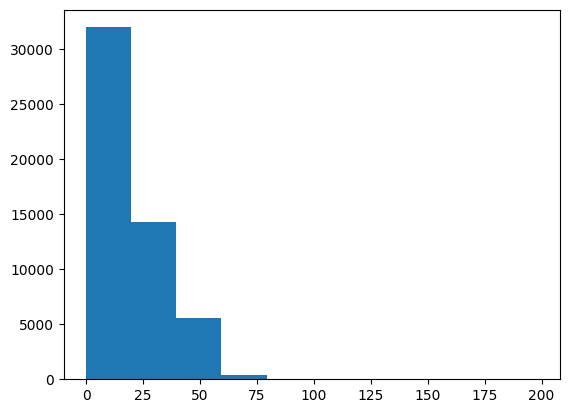

In [11]:
train_lens = [len(str(i).split()) for i in train_text] 
plt.hist(train_lens)


In [13]:
import torch

In [19]:
train_text.astype(str)

4838     Today, a parcel arrived with Amazon and I did ...
11069    Tried my luck to find a Xbox series x today no...
49145                                       Highest Prize.
61887    I’ve been playing this game for seven centurie...
1876     back on my dry borderlands too shit tho or i c...
                               ...                        
45331    @ FredTJoseph hey fred, Comcast has cut the ca...
63268    No fucking flipping way... is DHop a rated 103...
51937    I've been playing Red Dead Redemption for 2 da...
49913    I don't get this. If-Odoi is so greedy. With F...
22046    Catching Change @ CSGO pic.wikipedia.org / JzT...
Name: tweet, Length: 52277, dtype: object

In [20]:
train_text

4838     Today, a parcel arrived with Amazon and I did ...
11069    Tried my luck to find a Xbox series x today no...
49145                                       Highest Prize.
61887    I’ve been playing this game for seven centurie...
1876     back on my dry borderlands too shit tho or i c...
                               ...                        
45331    @ FredTJoseph hey fred, Comcast has cut the ca...
63268    No fucking flipping way... is DHop a rated 103...
51937    I've been playing Red Dead Redemption for 2 da...
49913    I don't get this. If-Odoi is so greedy. With F...
22046    Catching Change @ CSGO pic.wikipedia.org / JzT...
Name: tweet, Length: 52277, dtype: object

In [27]:
import torch
from transformers import BertTokenizerFast

# Load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')



# Set padding length
pad_len = 120

# Tokenize and encode sequences
tokens_train = tokenizer(
    train_text,
    max_length=pad_len,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

tokens_val = tokenizer(
    val_text,
    max_length=pad_len,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

tokens_test = tokenizer(
    test_text,
    max_length=pad_len,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Convert lists to tensors
train_seq = tokens_train['input_ids']
train_mask = tokens_train['attention_mask']
train_y = torch.tensor(train_labels)

val_seq = tokens_val['input_ids']
val_mask = tokens_val['attention_mask']
val_y = torch.tensor(val_labels)

test_seq = tokens_test['input_ids']
test_mask = tokens_test['attention_mask']
test_y = torch.tensor(test_labels)

print(train_seq)
print(train_mask)
print(train_y)
print(val_seq)
print(val_mask)
print(val_y)
print(test_seq)
print(test_mask)
print(test_y)


tensor([[ 101, 2023, 2003, 1037, 7099, 2731, 6251, 1012,  102,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [ 101, 2178, 7099, 2731, 6251, 1012,  102,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0, 

In [28]:
import torch
import torch.nn as nn
from transformers import BertModel

# Freeze the pretrained layers
for param in bert.parameters():
    param.requires_grad = False

# Define new layers
class BERT_architecture(nn.Module):

    def __init__(self, bert):
        super(BERT_architecture, self).__init__()

        self.bert = bert
        
        # Dropout layer
        self.dropout = nn.Dropout(0.2)
        
        # ReLU activation function
        self.relu = nn.ReLU()
        
        # Dense layer 1
        self.fc1 = nn.Linear(768, 512)
        
        # Dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)
        
        # Softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    # Define the forward pass
    def forward(self, sent_id, mask):
        # Pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
        
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        
        # Output layer
        x = self.fc2(x)
        
        # Apply softmax activation
        x = self.softmax(x)
        
        return x


In [29]:
from transformers import AdamW

# Assuming 'model' is an instance of your BERT_architecture class
model = BERT_architecture(bert)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)



c:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [30]:
import numpy as np
import torch

# Define the function to train the model
def train_model(model, optimizer, train_dataloader, device, cross_entropy_loss):
    model.train()  # Set the model to training mode

    total_loss = 0
    total_preds = []

    # Iterate over batches
    for step, batch in enumerate(train_dataloader):
        # Progress update after every 50 batches
        if step % 50 == 0 and not step == 0:
            print(f'Batch {step} of {len(train_dataloader)}.')

        # Push the batch to GPU
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch

        # Clear previously calculated gradients
        model.zero_grad()

        # Get model predictions for the current batch
        preds = model(sent_id, mask)

        # Compute the loss between actual and predicted values
        loss = cross_entropy_loss(preds, labels)

        # Add to the total loss
        total_loss += loss.item()

        # Backward pass to calculate gradients
        loss.backward()

        # Clip gradients to prevent exploding gradients issue
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters
        optimizer.step()

        # Model predictions are stored on GPU, so push to CPU
        preds = preds.detach().cpu().numpy()

        # Append the model predictions
        total_preds.append(preds)

    # Compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

    # Predictions are in the form of (no. of batches, size of batch, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    # Return the average loss and predictions
    return avg_loss, total_preds


In [31]:
import torch
import numpy as np

# Function for evaluating the model
def evaluate_model(model, val_dataloader, device, cross_entropy_loss):
    print("\nEvaluating...")

    # Set the model to evaluation mode
    model.eval()

    total_loss = 0
    total_preds = []

    # Iterate over batches
    for step, batch in enumerate(val_dataloader):
        # Progress update every 50 batches
        if step % 50 == 0 and not step == 0:
            print(f'Batch {step} of {len(val_dataloader)}.')

        # Push the batch to GPU
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch

        # Deactivate autograd
        with torch.no_grad():
            # Model predictions
            preds = model(sent_id, mask)

            # Compute the validation loss between actual and predicted values
            loss = cross_entropy_loss(preds, labels)
            total_loss += loss.item()

            # Detach and move predictions to CPU
            preds = preds.detach().cpu().numpy()
            total_preds.append(preds)

    # Compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # Reshape the predictions in the form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds


In [34]:
import torch

# Check if GPU is available and choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Alternatively, specify a specific GPU device
# device = torch.device("cuda:0")  # Use GPU 0

# Example usage with a tensor
tensor = torch.tensor([1, 2, 3]).to(device)




In [35]:
from sklearn.metrics import classification_report 

In [36]:
# get predictions for test data 
with torch.no_grad(): 
 preds = model(test_seq.to(device), test_mask.to(device)) 
 preds = preds.detach().cpu().numpy() 
	

 pred = np.argmax(preds, axis = 1) 
 print(classification_report(test_y, pred))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [37]:
import torch
import numpy as np
from sklearn.metrics import classification_report

# Assuming 'model', 'test_seq', 'test_mask', 'test_y', and 'device' are defined

# Set the model to evaluation mode
model.eval()

# Get predictions for test data
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

# Convert predictions to labels
pred_labels = np.argmax(preds, axis=1)

# Print classification report
print(classification_report(test_y, pred_labels))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo